In [1]:
import SamplingMoireMethod

import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# ---------------------------
allplotTF = 0 # 全プロット表示・非表示
camera_id = 0 # カメラID or ファイル名
rotateTF = 0 # 画像回転？
# ---------------------------
# ---------------------------
centerX, centerY = 352, 240  # サンプリングのセンターピクセル指定
lengthX = 220
lengthY = lengthX
linewidth = 10
GaussConst = 65 # 平滑化のための定数（奇数）
SamplingPitch = (54,54) # (H,V)．ゼロにすると推定．
# ---------------------------

カメラの設定確認（傾き，コントラスト）

In [3]:
SamplingMoireMethod.LiveCamera(camera_id, rotateTF)

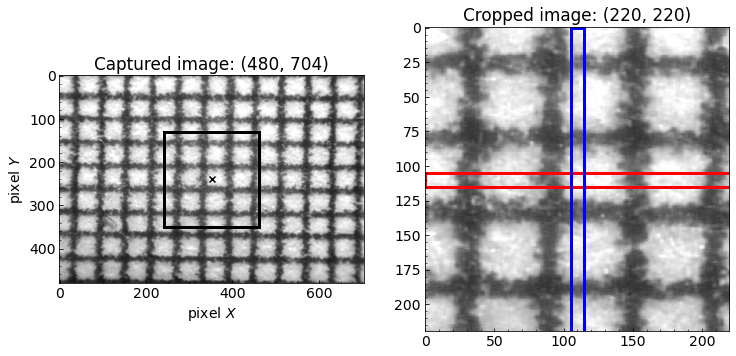

In [49]:
im_gray = SamplingMoireMethod.CapturedImage(camera_id, rotateTF, 0)
(im_Htrim, im_Vtrim) = SamplingMoireMethod.ImageHVTrim(
    im_gray, (centerX, centerY), (lengthX, lengthY), linewidth, GaussConst, 1)

初期化：基準位置（位相）の測定

In [50]:
((unmove_phi_H,unmove_phi_V),SamplingPitch) = SamplingMoireMethod.ImageToPhase(
    camera_id, rotateTF, (centerX, centerY), (lengthX, lengthY), linewidth, GaussConst, SamplingPitch, 0)
H_AveDeltaPhi = []
V_AveDeltaPhi = []
MeasTime = []

forループで連続測定

In [51]:
n = 1000
t0 = time.time() 
try:
    for i in range(n):
        ((move_phi_H,move_phi_V),_) = SamplingMoireMethod.ImageToPhase(
            camera_id, rotateTF, (centerX, centerY), (lengthX, lengthY), 
            linewidth, GaussConst, SamplingPitch, 0)
        H_AveDeltaPhi.append(SamplingMoireMethod.PhaseToAveDeltaPhi(unmove_phi_H, move_phi_H, 0))
        V_AveDeltaPhi.append(SamplingMoireMethod.PhaseToAveDeltaPhi(unmove_phi_V, move_phi_V, 0))
        MeasTime.append(time.time() - t0)
#         time.sleep(10-0.29)
except KeyboardInterrupt:
    print("キャンセルされました．")
    
print("１回の位置検出平均処理時間 [s]：", np.mean(np.diff(MeasTime)))

１回の位置検出平均処理時間 [s]： 1.0289476872445107


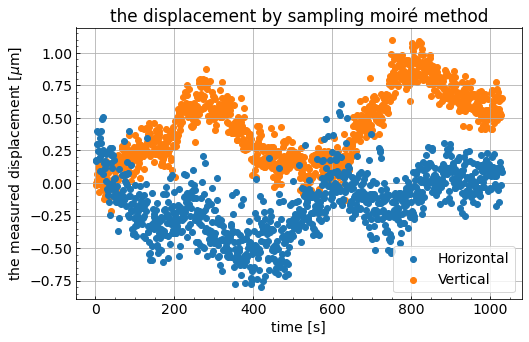

In [53]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('the displacement by sampling moiré method')
ax.scatter(MeasTime, (np.array(H_AveDeltaPhi)*400)/(2*np.pi), label='Horizontal', zorder=5)
ax.scatter(MeasTime, (np.array(V_AveDeltaPhi)*400)/(2*np.pi), label='Vertical', zorder=4)
plt.grid(True, which="major", linestyle="-")
ax.set_xlabel('time [s]')
ax.set_ylabel('the measured displacement [$\mu$m]')
ax.legend()
# 画像保存
savefilename = "SMMZeroPosTest"
if 1:
    plt.savefig(savefilename+'.svg', bbox_inches='tight')
plt.show()

In [55]:
import statistics
print("平均:", statistics.mean((np.array(V_AveDeltaPhi)*400)/(2*np.pi)))
print("標準偏差:",  statistics.stdev((np.array(V_AveDeltaPhi)*400)/(2*np.pi)))

平均: 0.42788936321518584
標準偏差: 0.27246872084302887


実行するたびに測定

In [17]:
((move_phi_H,move_phi_V),_) = SamplingMoireMethod.ImageToPhase(
    camera_id, rotateTF, (centerX, centerY), (lengthX, lengthY), 
    linewidth, GaussConst, SamplingPitch, 0)
H_AveDeltaPhi.append(SamplingMoireMethod.PhaseToAveDeltaPhi(unmove_phi_H, move_phi_H, 0))
V_AveDeltaPhi.append(SamplingMoireMethod.PhaseToAveDeltaPhi(unmove_phi_V, move_phi_V, 0))

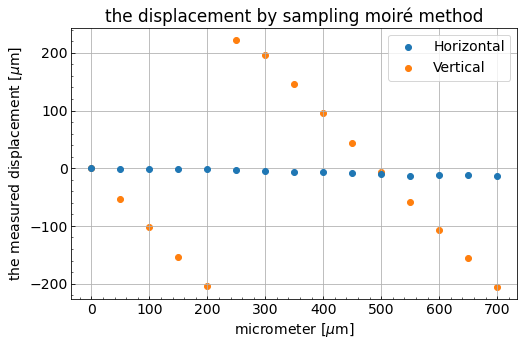

In [69]:
x = range(0,310,10)

fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('the displacement by sampling moiré method')
ax.scatter(x, (np.array(H_AveDeltaPhi)*500)/(2*np.pi), label='Horizontal', zorder=2)
ax.scatter(x, (np.array(V_AveDeltaPhi)*500)/(2*np.pi), label='Vertical', zorder=1)
plt.grid(True, which="major", linestyle="-")
ax.set_xlabel('micrometer [$\mu$m]')
ax.set_ylabel('the measured displacement [$\mu$m]')
ax.legend()
# 画像保存
savefilename = "SMMZeroPosTest"
if 1:
    plt.savefig(savefilename+'.svg', bbox_inches='tight')
plt.show()